#Introdução

Aluno: Daniel Hiroyuki Watanabe

RA: 800697

##Por que visualizar?

A visualização é muito importante para ajudar a compreensão da ideia do que se quer oferecer. Afinal, geralmente, a visualização é a primeira coisa que a gente faz quando se deparamos com algo.

Pensando nisso, a ideia desse colab é exemplificar duas customizações de cada biblioteca (Matplotlib, Seaborn, Plotly), aprofundando em suas características.

##Teoria das cores

Mas claro, não poderíamos deixar de passar em um tópico importante que são elas, as cores.
A cor é uma ferramenta tão poderosa que, por exemplo, em relação a comida, só de observar a cor, você pode, imediatamente, querer consumir tal refeição. Para tanto, é óbvio que possui um estudo muito aprofundado sobre o assunto. Tanto é que foi até proibido a utilização de certas cores para propagandas infantis, ratificando o quão sério é a questão da visualização.

Temos um exemplo sobre o que se chama de Psicologia das cores:

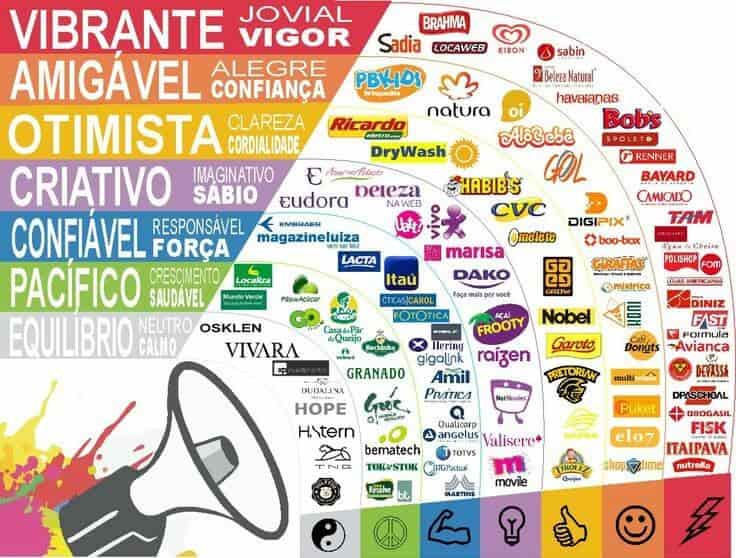

Ademais, podemos adicionar as cores que se complementam:

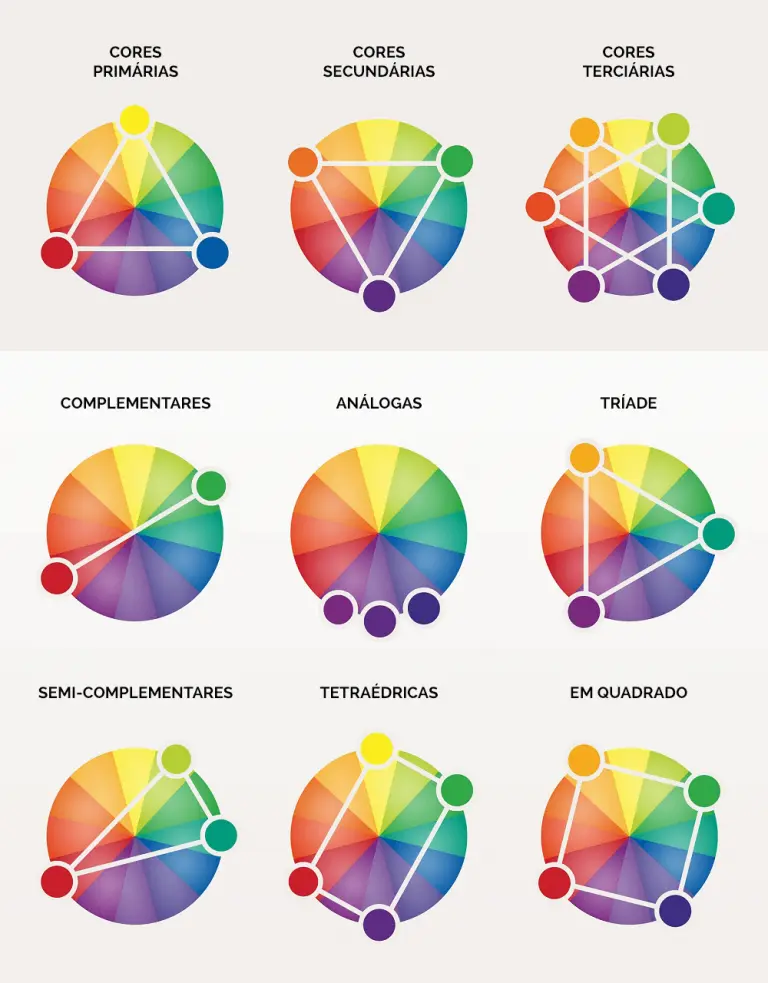

#DataSet de Expectativa de vida no japao

O dataset utilizado visa observar a expectativa de cada província dado suas colunas como, quantidade de médicos, horas trabalhadas, quantidade de parques.

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn import preprocessing
warnings.filterwarnings('ignore')
from scipy import stats
%matplotlib inline

In [ ]:
database = pd.read_csv('/content/Japan_life_expectancy.csv')

In [ ]:
database

,Prefecture,Life_expectancy,Physician,Junior_col,University,Public_Hosp,Pshic_hosp,Beds_psic,Nurses,Avg_hours,...,Park,Forest,Income_per capita,Density_pop,Hospitals,Beds,Ambulances,Health_exp,Educ_exp,Welfare_exp
0,Aichi,84.65,224.4,13.6,23.7,13.7,0.5,164.3,845.4,171.5,...,17.2,42.1,3728.0,2517.7,3.8,758.7,3.7,2.06,21.41,16.53
1,Akita,83.79,242.6,11.3,11.9,34.0,1.7,404.6,1105.5,173.0,...,10.6,70.3,2697.0,296.8,5.2,1168.5,9.0,3.24,17.93,13.50
2,Aomori,82.80,212.5,11.4,11.8,42.9,1.4,348.7,1108.8,174.5,...,11.8,63.6,2507.0,380.5,6.2,1112.8,9.1,3.40,20.98,15.92
3,Chiba,84.48,205.8,14.7,24.9,16.1,0.5,195.8,749.1,173.5,...,5.5,30.1,3116.0,1778.4,4.1,806.2,4.2,3.53,25.44,18.24
4,Ehime,84.24,276.7,14.2,18.0,17.4,1.0,329.7,1277.5,178.0,...,7.2,70.5,2658.0,801.2,9.1,1274.2,7.1,4.82,20.47,15.60
5,Fukui,84.91,257.9,12.9,18.8,22.8,1.3,284.1,1124.5,173.0,...,14.8,73.9,3280.0,711.9,7.4,1148.3,7.3,2.40,20.51,12.38
6,Fukuoka,84.54,309.9,14.2,20.4,8.9,1.2,407.0,1333.7,172.5,...,17.7,44.5,2885.0,1858.3,7.7,1328.3,3.8,2.54,18.82,21.51
7,Fukushima,83.71,205.7,11.6,13.1,20.6,1.3,339.8,994.7,173.0,...,13.0,68.0,2943.0,433.3,5.6,1033.2,7.4,3.09,17.63,18.81
8,Gifu,84.71,224.5,13.4,18.5,24.7,0.6,195.2,942.7,175.0,...,18.4,79.0,2919.0,895.1,4.3,834.1,7.5,3.18,24.82,15.29
9,Gunma,84.16,233.8,14.7,17.5,16.5,0.7,257.5,1054.1,174.0,...,14.0,64.0,3283.0,854.6,5.9,1047.7,5.8,2.59,24.21,17.28


https://www.kaggle.com/datasets/gianinamariapetrascu/japan-life-expectancy?resource=download

In [ ]:
database.columns

Index(['Prefecture', 'Life_expectancy', 'Physician', 'Junior_col',
       'University', 'Public_Hosp', 'Pshic_hosp', 'Beds_psic', 'Nurses',
       'Avg_hours', 'Salary', 'Elementary_school', 'Sport_fac', 'Park',
       'Forest', 'Income_per capita', 'Density_pop', 'Hospitals', 'Beds',
       'Ambulances', 'Health_exp', 'Educ_exp', 'Welfare_exp'],
      dtype='object')

##Verificação de inconsistências

In [ ]:
database.describe()

,Life_expectancy,Physician,Junior_col,University,Public_Hosp,Pshic_hosp,Beds_psic,Nurses,Avg_hours,Salary,...,Park,Forest,Income_per capita,Density_pop,Hospitals,Beds,Ambulances,Health_exp,Educ_exp,Welfare_exp
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,...,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,84.525745,261.438298,13.627660,18.621277,21.263830,1.114894,317.861702,1121.568085,173.914894,290.817021,...,17.070213,61.580851,3003.829787,1351.429787,6.874468,1130.825532,6.391489,3.359574,21.310426,15.968936
std,0.503133,40.948842,1.243191,4.459818,10.393548,0.557548,119.613115,244.333898,1.482943,24.657670,...,8.926412,14.966450,467.912446,1791.211704,2.783606,263.363158,1.874524,0.844970,2.923241,2.629713
min,82.800000,177.800000,11.300000,11.800000,7.400000,0.300000,147.700000,704.000000,171.000000,254.500000,...,4.500000,29.900000,2391.000000,230.200000,3.100000,676.900000,2.600000,2.060000,16.040000,10.310000
25%,84.240000,230.400000,12.850000,15.750000,14.650000,0.700000,224.050000,945.650000,173.000000,270.250000,...,10.950000,51.800000,2705.500000,601.750000,4.900000,949.100000,5.250000,2.780000,19.545000,14.150000
50%,84.540000,257.900000,13.500000,18.100000,19.200000,1.000000,299.000000,1096.100000,173.500000,291.500000,...,14.800000,66.300000,2945.000000,786.800000,5.900000,1112.800000,6.300000,3.210000,20.940000,15.600000
75%,84.885000,290.950000,14.350000,20.600000,25.300000,1.350000,367.150000,1278.200000,175.000000,303.575000,...,20.900000,73.650000,3175.000000,1260.250000,8.250000,1286.000000,7.400000,3.760000,23.525000,17.510000
max,85.500000,338.400000,16.900000,31.600000,49.100000,2.300000,594.900000,1640.700000,178.000000,378.150000,...,37.300000,83.300000,5415.000000,9873.300000,16.100000,2052.600000,11.600000,6.050000,27.530000,23.010000


In [ ]:
database.count()

Prefecture           47
Life_expectancy      47
Physician            47
Junior_col           47
University           47
Public_Hosp          47
Pshic_hosp           47
Beds_psic            47
Nurses               47
Avg_hours            47
Salary               47
Elementary_school    47
Sport_fac            47
Park                 47
Forest               47
Income_per capita    47
Density_pop          47
Hospitals            47
Beds                 47
Ambulances           47
Health_exp           47
Educ_exp             47
Welfare_exp          47
dtype: int64

In [ ]:
database.isnull().sum()

Prefecture           0
Life_expectancy      0
Physician            0
Junior_col           0
University           0
Public_Hosp          0
Pshic_hosp           0
Beds_psic            0
Nurses               0
Avg_hours            0
Salary               0
Elementary_school    0
Sport_fac            0
Park                 0
Forest               0
Income_per capita    0
Density_pop          0
Hospitals            0
Beds                 0
Ambulances           0
Health_exp           0
Educ_exp             0
Welfare_exp          0
dtype: int64

#Criação de Gráficos

##Alguns adendos

Para uma visualização mais intuitiva, selecionou-se algumas províncias com as seguintes condições:





*   Menor expectativa de vida => Aomori
*   Maior expectativa de vida => Shiga
*   Duas províncias bem famosas => Kyoto e Tokyo

Além disso os dados foram normalizados nos seguintes atributos:
'Expectativa de vida', 'Qtd de médicos', 'Horas trabalhadas','Qtd de parques', 'Densidade Populacional','Qtd de camas em hospitais

*   Expectativa de vida
*   Quantidade de médicos
*   Horas trabalhadas
*   Quantidade de parques
*   Densidade populacional
*   Quantidade de camas em hospitais











In [ ]:
#Criando outra variavel
db_normal = database.copy()
#Tirando as colunas que não vamos observar
db_normal = db_normal.drop(["Junior_col","University","Public_Hosp","Pshic_hosp","Beds_psic","Nurses","Salary","Elementary_school","Sport_fac","Forest","Income_per capita","Hospitals","Ambulances","Health_exp","Educ_exp","Welfare_exp"],axis=1)
#Pegar as províncias que queremos comparar
db_normal = db_normal.loc[(db_normal['Prefecture'] == 'Aomori') | (db_normal['Prefecture'] == 'Shiga') | (db_normal['Prefecture'] == 'Tokyo') | (db_normal['Prefecture'] == 'Kyoto')]
db_normal = db_normal.reset_index()
db_normal = db_normal.drop(['index'], axis = 1)

print(db_normal)


#Normalização
x = db_normal.drop(["Prefecture"],axis=1)
x = x.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
db_normal = pd.DataFrame(x_scaled)
#Readicionar as provincias
provincias = ['Aomori', 'Kyoto', 'Shiga', 'Tokyo']
db_normal['Prefecture'] = provincias
#Reordenar
db_normal = db_normal[['Prefecture', 0,1,2,3,4,5]]
#Renomear os atributos
db_normal.set_axis(['Prefecture', 'Expectativa de vida', 'Qtd de médicos', 'Horas trabalhadas','Qtd de parques', 'Densidade Populacional','Qtd de camas em hospitais'], axis='columns', inplace=True)

print(db_normal)



  Prefecture  Life_expectancy  Physician  Avg_hours  Park  Density_pop    Beds
0     Aomori            82.80      212.5      174.5  11.8        380.5  1112.8
1      Kyoto            85.25      332.6      172.0  20.6       2189.8  1130.5
2      Shiga            85.50      236.3      173.0  37.3       1087.8   861.2
3      Tokyo            84.82      320.9      171.5  36.4       9873.3   807.7
  Prefecture  Expectativa de vida  Qtd de médicos  Horas trabalhadas  \
0     Aomori             0.000000        0.000000           1.000000   
1      Kyoto             0.907407        1.000000           0.166667   
2      Shiga             1.000000        0.198168           0.500000   
3      Tokyo             0.748148        0.902581           0.000000   

   Qtd de parques  Densidade Populacional  Qtd de camas em hospitais  
0        0.000000                0.000000                   0.945167  
1        0.345098                0.190597                   1.000000  
2        1.000000              

##Algumas considerações sobre as bibliotecas

Consider Matplotlib if you want a fully open-source package, if you are looking for an interface with similarities to MATLAB, or if you are switching from MATLAB.

Consider Plotly if you don't mind some closed-source packages or if you want to display your interactive data visualizations on the web. If you use other programming languages besides Python, Plotly's graphing library is the better option.

Matplotlib is an open-source plotting library for creating visualizations within Python. It is best suited to initial exploratory analysis or minimalistic graph designs. Matplotlib is also designed to have similarities with MATLAB.

Plotly is a mostly open-source data analytics and visualization tool (with some closed-source products and services). It creates interactive charts for web browsers and supports multiple languages, such as Python, Julia, R, and MATLAB.

Matplotlib is a popular plotting package that is being continuously developed. It offers numerous rendering backends and uses a verbose syntax, giving plots a high degree of flexibility and customizability.

seaborn is a Python plotting library built on top of Matplotlib. It allows for a concise but limited approach to quickly visualize data sets with better-looking style defaults than Matplotlib.

Consider Matplotlib if you want to create highly customized plots or are looking to learn the plotting tool behind seaborn.

Consider seaborn if you want to write concise code and create plots (especially statistical plots) with more attractive default styles in less time.

##MatPlotLib

Matplotlib é uma biblioteca de software para criação de gráficos e visualizações de dados em geral.

É uma poderosa ferramenta que permite uma personalização imensa, entretanto, as vezes pode se tornar um pouco capcioso seu gerenciamento.

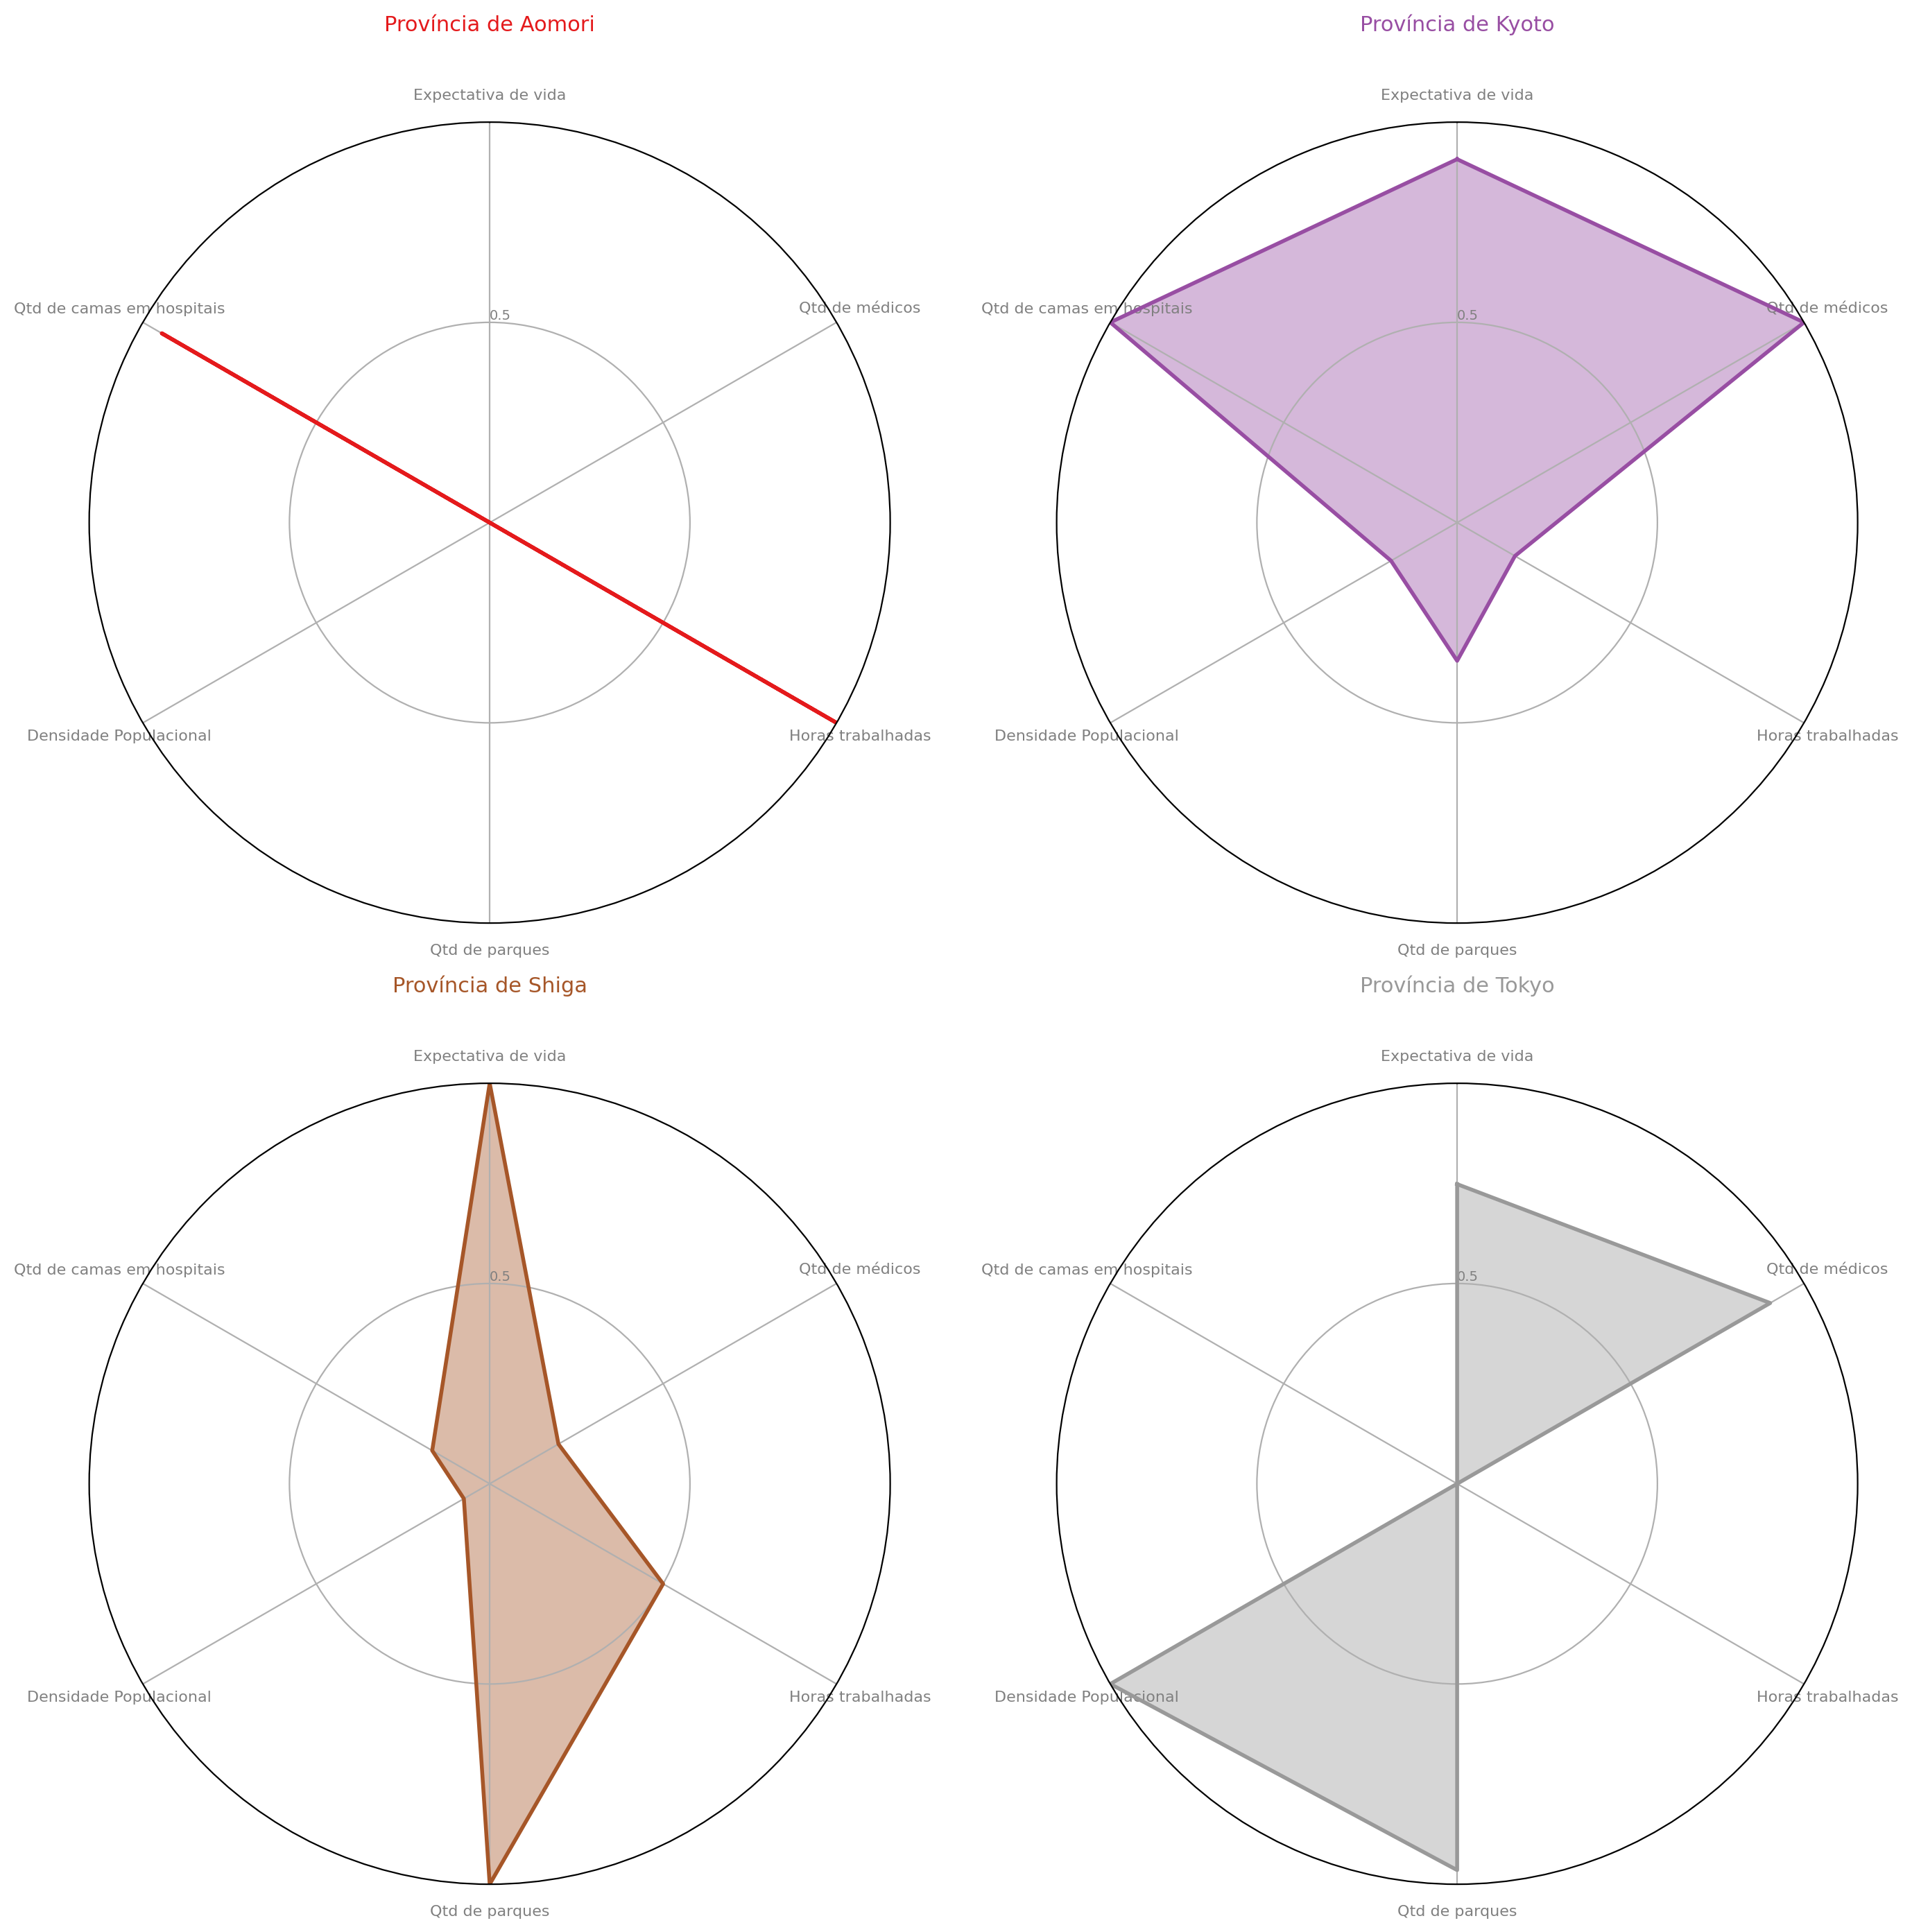

In [ ]:
from math import pi

def make_spider( row, title, color):

    # Qtd de variaveis
    categories = list(db_normal)[1:]
    N = len(categories)

    # O angulo de cada eixo, divide-se o plot inteiro por numero de variaveis)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Inicializa o subplot de radar
    ax = plt.subplot(2,2,row+1, polar=True, )

    # Primeira atributo estará no topo
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Desenhar um eixo por variavel e add suas legendas
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Desenhar as legendas dos atributos
    ax.set_rlabel_position(0)
    plt.yticks([0.5], ["0.5"], color="grey", size=7)
    plt.ylim(0,1)

    # Ind1
    values=db_normal.loc[row].drop('Prefecture').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Adicionar o título
    plt.title(title, size=11, color=color, y=1.1)

# Inicializar a figura
my_dpi=200
plt.figure(figsize=(3300/my_dpi, 3300/my_dpi), dpi=my_dpi)
plt.tight_layout()

# Mudar a paleta de cor:
my_palette = plt.cm.get_cmap("Set1", len(db_normal.index))

# Criar vários radares
for row in range(0, len(db_normal.index)):
    make_spider( row=row, title='Província de '+db_normal['Prefecture'][row], color=my_palette(row))


Criou-se esse gráfico por conta da normalização de poucos atributos, dessa forma, foi considerado que a província que teve a menor expectativa de vida, tivesse 0 como seu parâmetro norteador de mínimo, ou seja, basicamente a província de Aomori teve 0 na maioria de seus atributos. Isso poderá ser corrigido com outros métodos de normalização. Mas o ponto é que mesmo com esse detalhe, é possível observar algumas características interessantes, apenas por sua visualização.

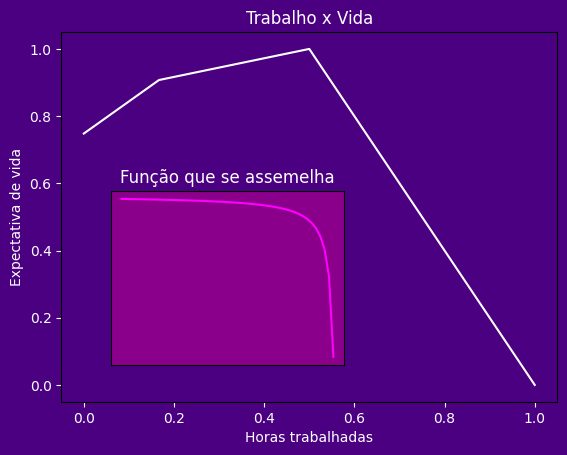

In [ ]:

db_ordenado = db_normal.sort_values(by='Horas trabalhadas')
sns.set_style()
y1 = db_ordenado['Expectativa de vida']
x1 = db_ordenado['Horas trabalhadas']

#Função interna que se assemelha
def f(x):
  return (np.e/(x-10))+10
x = np.linspace(8,10)
y = f(x)
#Cor do fundo de tudo
fig, ax = plt.subplots(facecolor="#4B0082")
ax.plot(x1,y1, color='white')
#Cor dos textos externos
ax.xaxis.label.set_color("White")
ax.yaxis.label.set_color("White")
ax.set_title('Trabalho x Vida', color='white')
ax.set_xlabel('Horas trabalhadas')
ax.set_ylabel('Expectativa de vida')

#A cor do Grafico
ax.set_facecolor('#4B0082')

#Definindo o tamanho e onde estará o grafico interno
axIns = ax.inset_axes([0.1,0.1,0.47,0.47])

axIns.plot(x,y,color='magenta')
axIns.set_title('Função que se assemelha', color="white")
axIns.set_xticks([])
axIns.set_yticks([])
#Alterando a cor do Axe interno
axIns.set_facecolor('#8B008B')

#Alteração dos parametros internos do plt
params = {
          "xtick.color" : "white",
          "ytick.color" : "white"}
plt.rcParams.update(params)


plt.show()


Foi criado esse outro gráfico de linha, com as relações Horas trabalhadas com Expectativa de vida

Podemos ver que claro, só com esses dados não tem como presumir nada, mas que possui uma certa similaridade com a função dada por: f(x) = (e/x-10)+10

Aqui vemos como essa biblioteca é poderosa em relação a visualização do que queremos demonstrar, temos a capacidade de mudar a estílistica de qualquer tipo de gráfico ao mesmo tempo que não perde o foco do resultado.

##SeaBorn

Com o seaborn foi criado o gráfico:

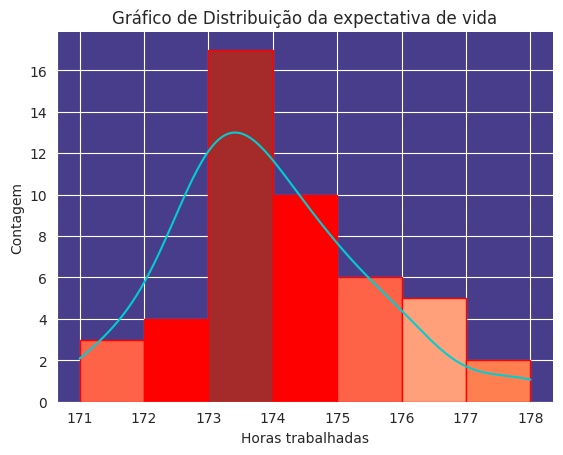

In [ ]:


axe = sns.histplot(database['Avg_hours'], kde=True, color='#00CED1', edgecolor='red')
#Retira as bordas laterais da direita e superior
sns.despine()
sns.set_style("darkgrid")

plt.xlabel('Horas trabalhadas')
plt.ylabel('Contagem')
plt.title('Gráfico de Distribuição da expectativa de vida')
#Alterando a cor de cada um
axe.set_facecolor('#483D8B')
axe.patches[0].set_facecolor('#FF6347')
axe.patches[1].set_facecolor('#FF0000')
axe.patches[2].set_facecolor('#A52A2A')
axe.patches[3].set_facecolor('#FF0000')
axe.patches[4].set_facecolor('#FF6347')
axe.patches[5].set_facecolor('#FFA07A')
axe.patches[6].set_facecolor('#FF7F50')
plt.show()

A ideia desse era conseguir customizar cada barra em seu devido patch, além de conseguir modificar a linha de dispersão.

Matriz de Dispersão

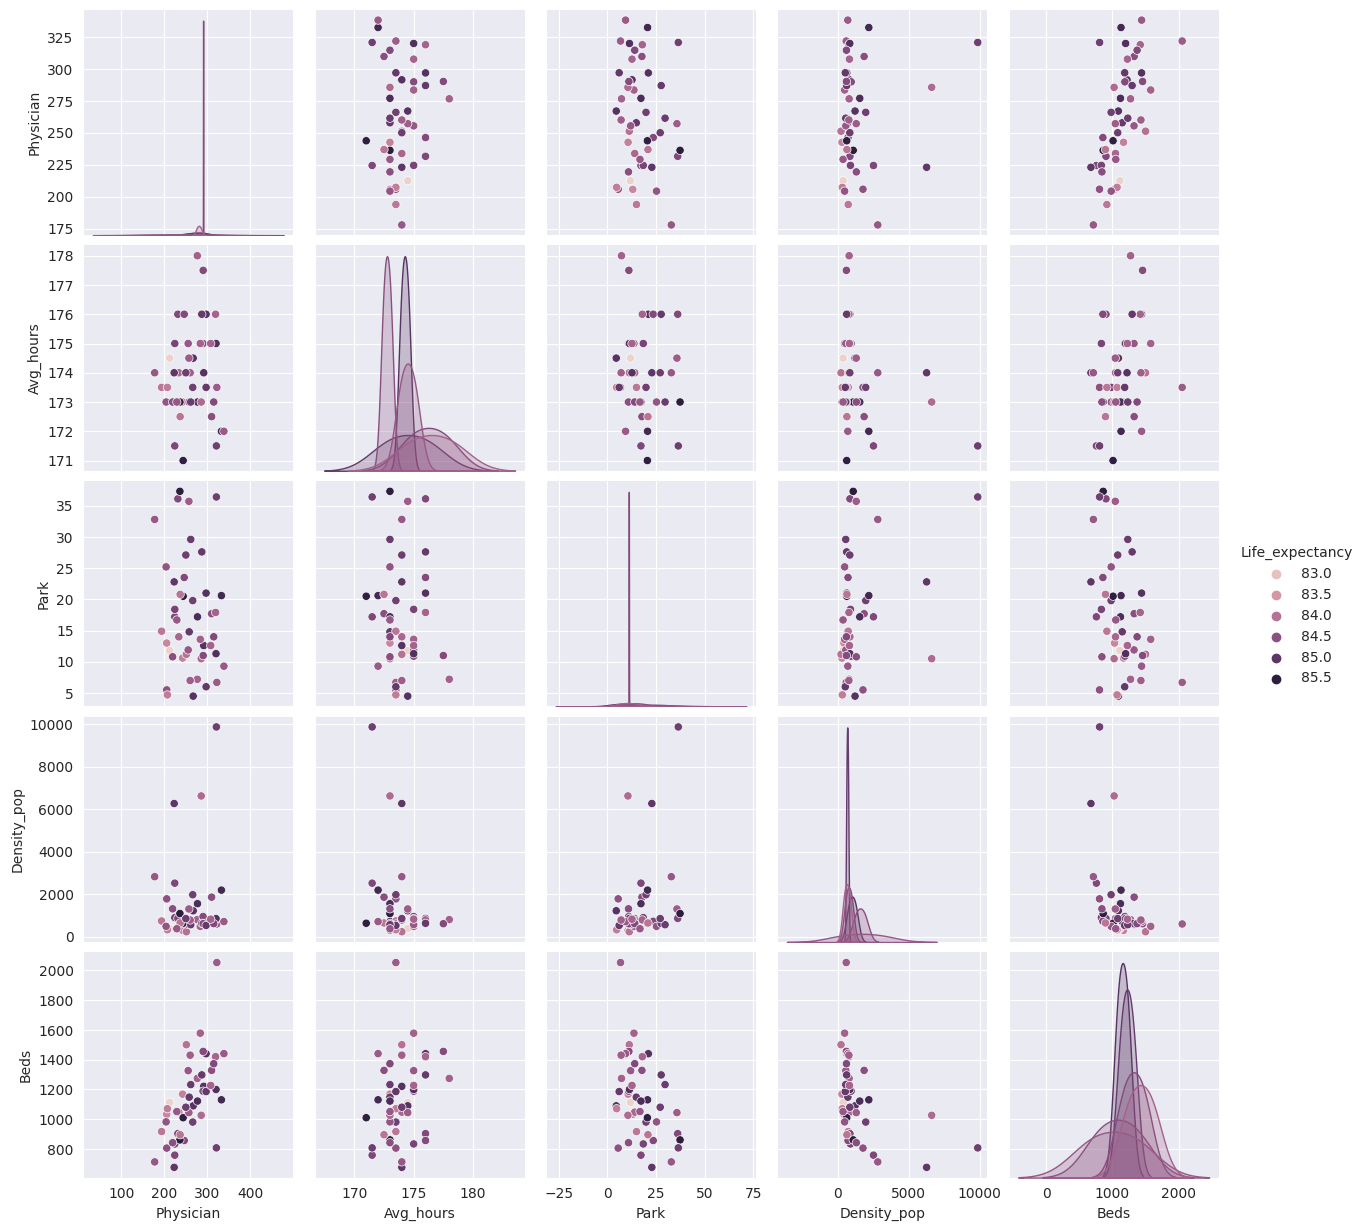

In [ ]:
db_teste = database.copy()
db_teste = db_teste.drop(["Junior_col","University","Public_Hosp","Pshic_hosp","Beds_psic","Nurses","Salary","Elementary_school","Sport_fac","Forest","Income_per capita","Hospitals","Ambulances","Health_exp","Educ_exp","Welfare_exp"],axis=1)
sns.pairplot(db_teste, hue='Life_expectancy')
plt.show()

Foi também criado uma matriz de dispersão

##Plotly

In [ ]:
fig = px.scatter_3d(db_normal, x=db_normal['Expectativa de vida'], y=db_normal['Horas trabalhadas'], z=db_normal['Qtd de parques'],
              color=db_normal['Prefecture'])

fig.update_layout(
    #Mudar o background
    paper_bgcolor="#4B0082",
    #Muda o bckground do grafico
    plot_bgcolor='DarkMagenta',
    #Mudar a cor da fonte e a fonte
    font_family="Courier New",
    font_color="white",
    font_size=10,
    polar=dict(
        radialaxis=dict(
                        visible=True,
                        range=[0, 1]
                    )
            ),

    title="Gráfico de 3D do dataset Normalizado"
)
fig.show()

Com o Plotly já é possível ver a diferença nítida quando se trata de fluídez / interatividade. Nesse gráfico Scatter 3D é possível verificar os três atributos juntos do conjunto normlizado, que são, quantidade de parques, hroas trabalhadas com a expectativa de vida

In [ ]:
import plotly.io as pio
fig = go.Figure()

fig.add_trace(
                go.Scatterpolar(
                                r=db_normal['Horas trabalhadas'],
                                theta=db_normal['Prefecture'],
                                name="Horas trabalhadas",
                                showlegend=True,
                                )
                )
fig.add_trace(
                go.Scatterpolar(
                                r=db_normal['Expectativa de vida'],
                                theta=db_normal['Prefecture'],
                                name="Expectativa de vida",
                                showlegend=True,
                                )
                )
fig.add_trace(
                go.Scatterpolar(
                                r=db_normal['Qtd de médicos'],
                                theta=db_normal['Prefecture'],
                                name="Qtd de médicos",
                                showlegend=True,
                                )
                )
fig.add_trace(
                go.Scatterpolar(
                                r=db_normal['Qtd de camas em hospitais'],
                                theta=db_normal['Prefecture'],
                                name="Qtd de camas em hospitais",
                                showlegend=True,
                                )
                )
fig.add_trace(
                go.Scatterpolar(
                                r=db_normal['Densidade Populacional'],
                                theta=db_normal['Prefecture'],
                                name="Densidade populacional",
                                showlegend=True,
                                )
                )
fig.add_trace(
                go.Scatterpolar(
                                r=db_normal['Qtd de parques'],
                                theta=db_normal['Prefecture'],
                                name="Qtd de parques",
                                showlegend=True,
                                )
                )
fig.update_layout(
    #Mudar o background
    paper_bgcolor="black",
    #Muda o bckground do grafico
    plot_bgcolor='rgb(245,245,240)',
    #Mudar a cor da fonte e a fonte
    font_family="Courier New",
    font_color="white",
    font_size=30,
    polar=dict(
        radialaxis=dict(
                        visible=True,
                        range=[0, 1]
                    )
            ),

    title="Gráfico de radar do dataset Normalizado"
)

fig.show()

Criou-se esse mesmo gráfico de radar, mas com o Plotly. Mas ao contrário do anterior, esse foi posto tudo em um só, e como é também interativo, é possível retirar os atributos ao bel prazer. Dessa forma, facilita na observação e verificação em um gráfico só.
Além da customização do gráfico com suas cores.